In [ ]:
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/GitHub/img-gen

/content/gdrive/My Drive/GitHub/img-gen


In [ ]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing img_gen.egg-info/PKG-INFO
writing dependency_links to img_gen.egg-info/dependency_links.txt
writing top-level names to img_gen.egg-info/top_level.txt
writing manifest file 'img_gen.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying img_gen/img.py -> build/lib/img_gen
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/img_gen
copying build/lib/img_gen/__init__.py -> build/bdist.linux-x86_64/egg/img_gen
copying build/lib/img_gen/models.py -> build/bdist.linux-x86_64/egg/img_gen
copying build/lib/img_gen/gan.py -> build/bdist.linux-x86_64/egg/img_gen
copying build/lib/img_gen/img.py -> build/bdist.linux-x86_64/egg/img_gen
copying build/lib/img_gen/cycle_gan.py -> build/bdist.linux-x86_64/egg/img_gen
byte-compiling build/bdist.linux-x86_64/egg/img_gen/__init__.py to __init__.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/img

In [ ]:
%pip install tensorflow_addons

     |████████████████████████████████| 686kB 14.6MB/s 


In [ ]:
import tensorflow as tf

# setup tensorflow to use a GPU if available
if tf.test.gpu_device_name():
    print(f"Default GPU Device: {tf.test.gpu_device_name()}")
    tf.device(tf.test.gpu_device_name())

Default GPU Device: /device:GPU:0


In [ ]:
import tensorflow_datasets as tfds

# load the data set
data, metadata = tfds.load(
    "cycle_gan/monet2photo",
    with_info=True,
    as_supervised=True,
)

train_x, train_y = data["trainA"], data["trainB"]
test_x, test_y = data["testA"], data["testB"]

Shuffling and writing examples to /root/tensorflow_datasets/cycle_gan/monet2photo/2.0.0.incompleteYRPOJW/cycle_gan-trainA.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cycle_gan/monet2photo/2.0.0.incompleteYRPOJW/cycle_gan-trainB.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cycle_gan/monet2photo/2.0.0.incompleteYRPOJW/cycle_gan-testA.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cycle_gan/monet2photo/2.0.0.incompleteYRPOJW/cycle_gan-testB.tfrecord


Dataset cycle_gan downloaded and prepared to /root/tensorflow_datasets/cycle_gan/monet2photo/2.0.0. Subsequent calls will reuse this data.


In [ ]:
# preprocess data

from img_gen.img import preprocess_images

train_x = preprocess_images(train_x, jitter=True)
train_y = preprocess_images(train_y, jitter=True)
test_x = preprocess_images(test_x)
test_y = preprocess_images(test_y)

In [ ]:
# build model

from img_gen.cycle_gan import CycleGAN

cyc_gan = CycleGAN()

In [ ]:
# train
cyc_gan.train(train_x, train_y, test_x, test_y, checkpoints=False)

Output hidden; open in https://colab.research.google.com to view.

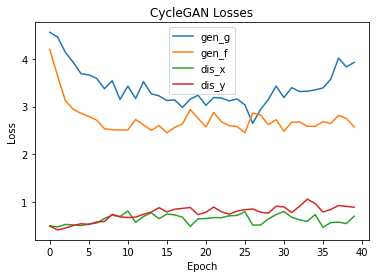

In [ ]:
cyc_gan.plot_losses()